### Importing libraries

In [137]:
import pytesseract
from PIL import Image

Lets see how ocr works and all

In [138]:
img1=Image.open("outputs/BWtext.jpg")


lets see can pytessaract work on non processed image

In [139]:
img1_result=pytesseract.image_to_string(img1)
print(img1_result) # empty string

GABRIEL Meamall

On Easter morning in the year 194, I took my six-year-old
son by the hand and began walking fron my home town toward the
valleys and forests of the Carpathian rountaing.. For nearly
eight months we aeved in barns, attics and makeshift cabins. ‘With
the OSES help of an unusually courageous man, we managed to
survive Europe's greatest fit of madness. Those who walked in
the opposite direction on that Easter day were less fortunate.
They were taken in trainloads to places whose once obscure names
are now, and forever will be, synonymous with terror, evil and
death, What follows is our story of survival told to the best
of my ability, in plain, simple language.

In March of 194% the SS troops took over the internal affairs
of Hungary and proceeded to organize the éeportation of the Jews.
fo the Nazis this was a routine assignment; within hours all local
officials were informed of operational plans. The high command
issued a directive designed to placate Jewish fears and in

### lets try OCR for the indexes

In [140]:
# open image with pillow
from PIL import Image
from matplotlib import pyplot as plt

In [141]:
# define display function
def display(im_path):
    
    dpi = 80
    im_data = plt.imread(im_path)

    # for color image , .shape function gives three Attribute
    if(len(im_data.shape)==3):
        height, width, depth = im_data.shape # difference
    else:
        height, width= im_data.shape  #difference

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

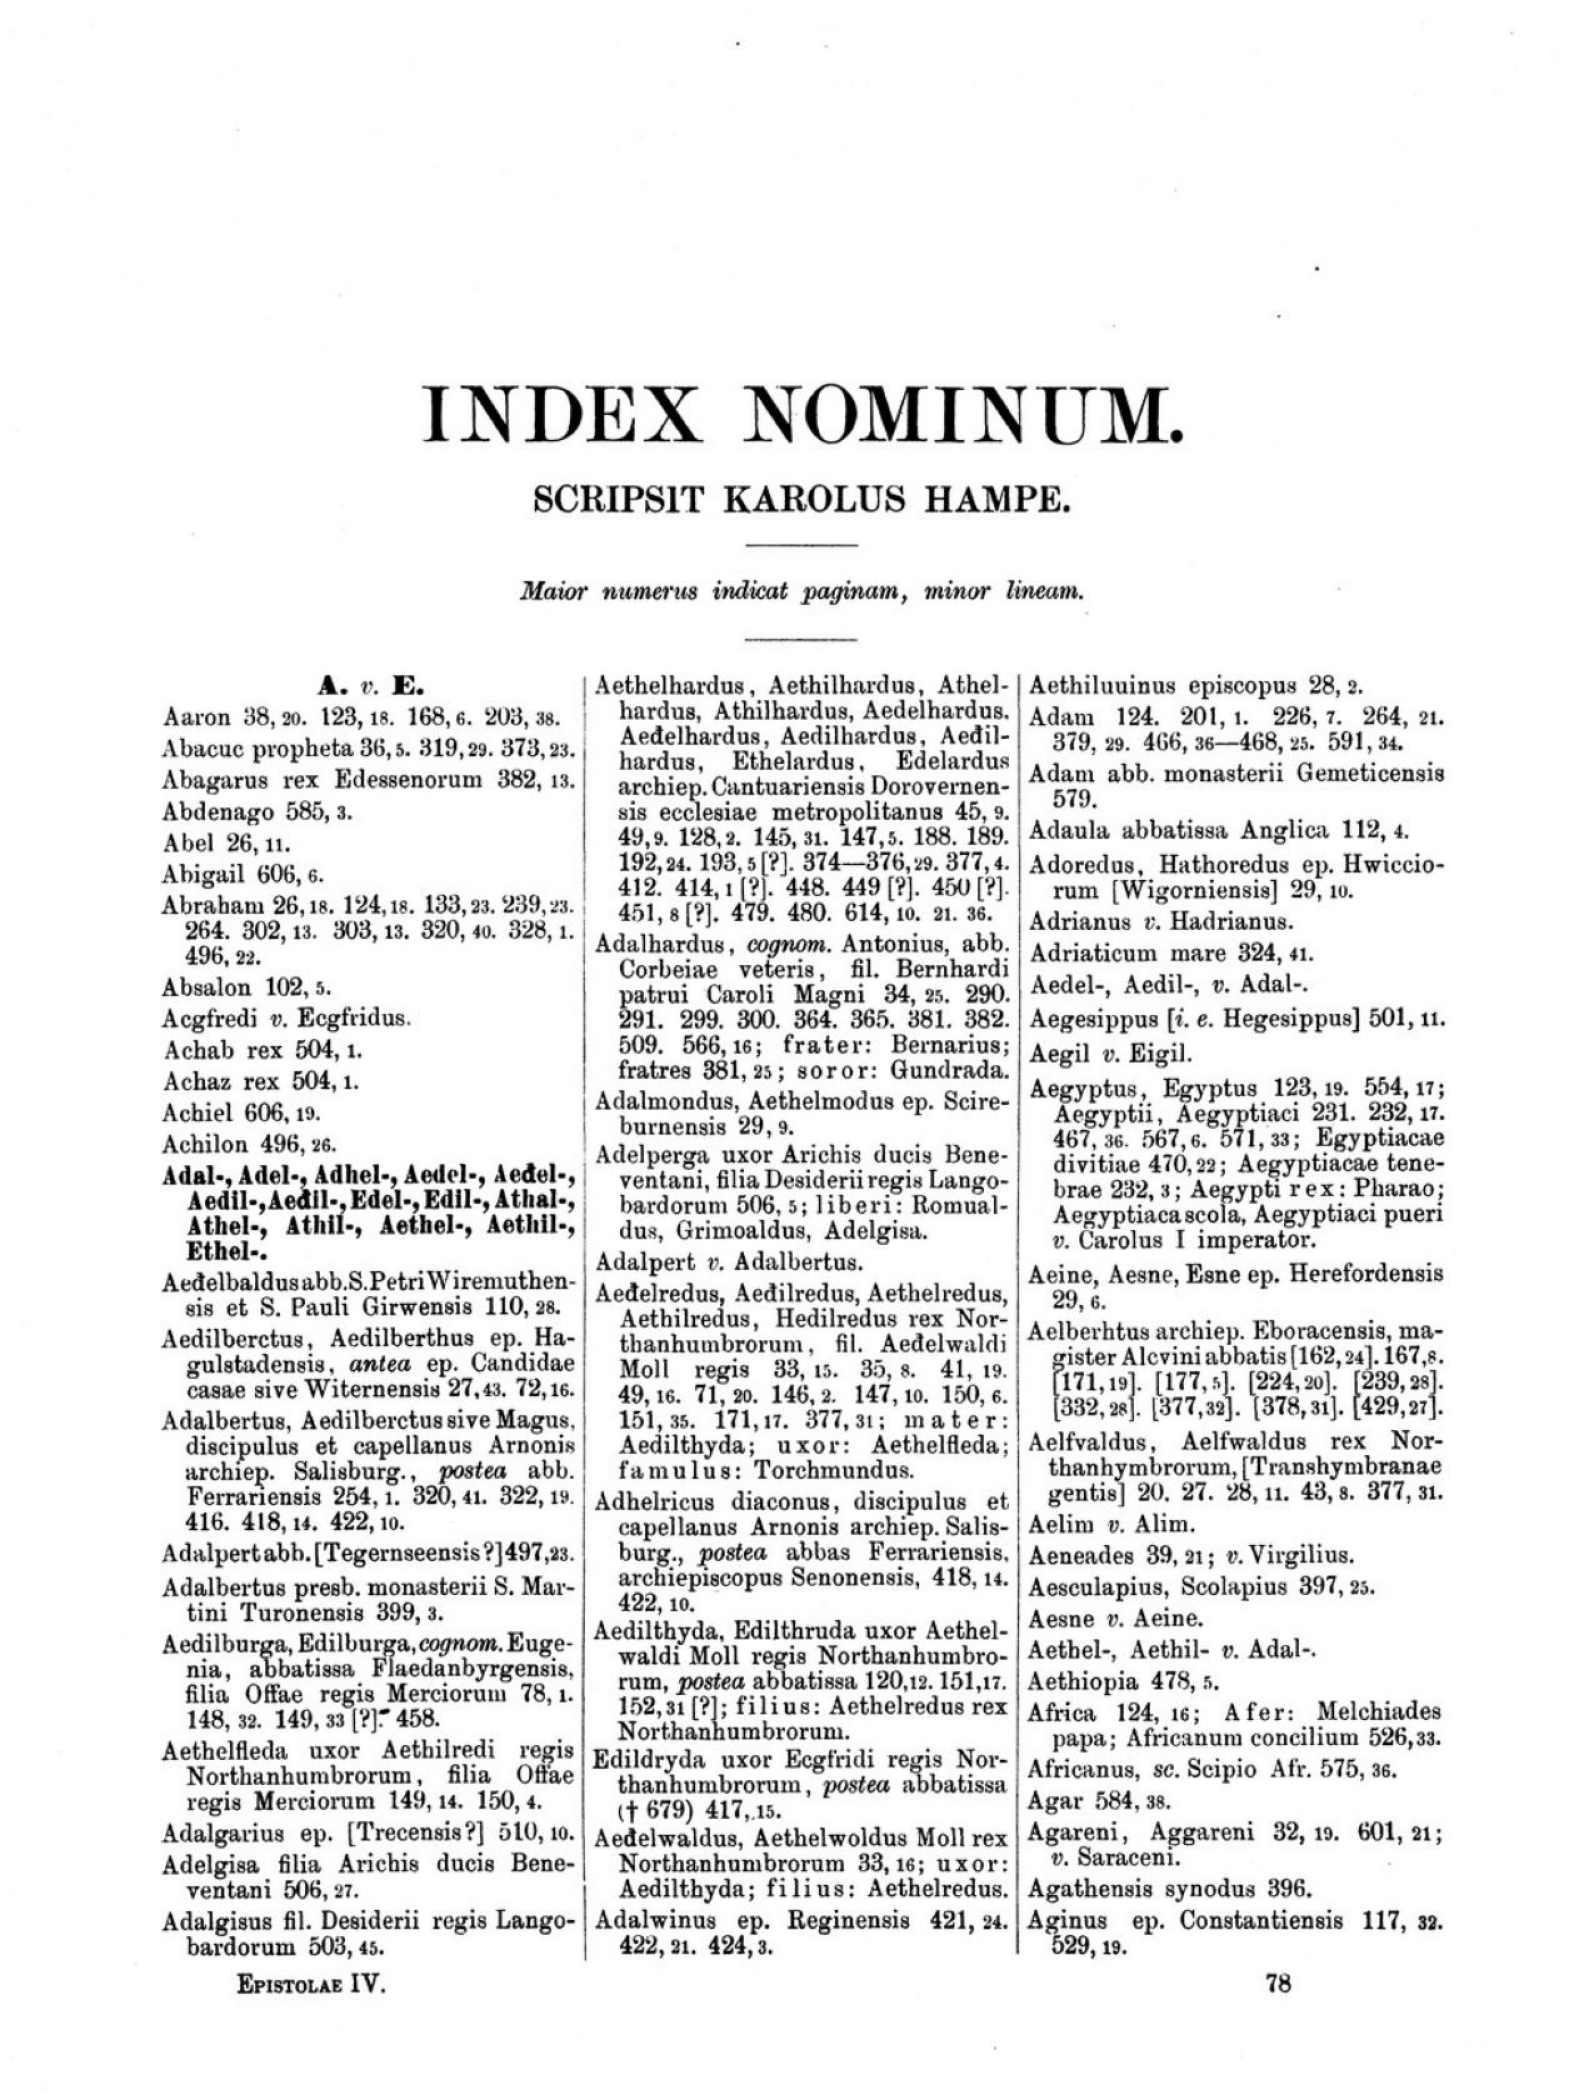

In [142]:
img=Image.open("data/index_02.JPG")
display("data/index_02.JPG")

In [143]:
# let try to work with index and see how it can performs 
ocr_result=pytesseract.image_to_string(img)
print(ocr_result)

INDEX NOMINUM.

SCRIPSIT KAROLUS HAMPE.

Maior numerus indicat paginam, minor lineam.

A.v. E.

Aaron 38, 20. 123, 18. 168, 6. 203, 38. |

Abacuc propheta 36,5. 319,29. 373, 23.
Abagarus rex Edessenorum 382, 13.
Abdenago 585, 3.

Abel 26, 11.

Abigail 606, 6.

Abraham 26,18. 124,18. 133, 23. 2:
264. 302, 13. 303, 13. 320, 40. 328, 1.
496, 22.

Absalon 102, 5.

Acgfredi v. Ecgfridus.

Achab rex 504, 1.

Achaz rex 504,1.

Achiel 606, 19.

Achilon 496, 26.

Adal-, Adel-, Adhel-, Aedel-, Aedel-,
‘Aedil-,Aed
Athel-, Athil-, Aethel-, Aethil-,
Ethel-.

Aedelbaldusabb.S. Petri W iremuthen-
sis et S. Pauli Girwensis 110, 28.

Aedilberctus, Aedilberthus ep. Ha-
gulstadensis, antea ep. Candidae
casae sive Witernensis 27,43, 72,16.

Adalbertus, Aedilberctus sive Magus,
discipulus et capellanus Arnonis
archiep. Salisburg., postea_abb.
Ferrariensis 254, 1. 320, 41. 322, 19.
416. 418, 14. 422, 10.

Adalpertabb. [Tegernseensis ?]497,2s.

Adalbertus presb. monasterii 8. Mar-
tini Turonensis 399, 3.

Ae

In [144]:
# now lets preprocess images using Opencv and then go for OCR task
import cv2

image selection and open with OpenV

In [145]:
text=cv2.imread("data/index_02.JPG")
car=cv2.imread("numberplates/Cars0.png")

convert normal image to grayscale

In [146]:
gray_text=cv2.cvtColor(text,cv2.COLOR_BGR2GRAY)
gray_car=cv2.cvtColor(car,cv2.COLOR_BGR2GRAY)


lets save them and see how they changed

In [147]:
cv2.imwrite("tessaractFiles/gray_text.png",gray_text)
cv2.imwrite("tessaractFiles/gray_car.png",gray_car)


True

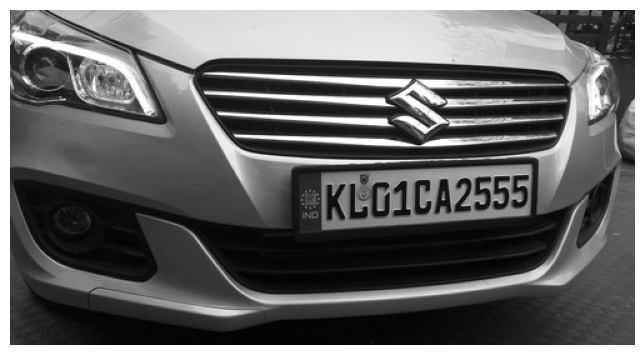

In [148]:
display("tessaractFiles/gray_car.png")

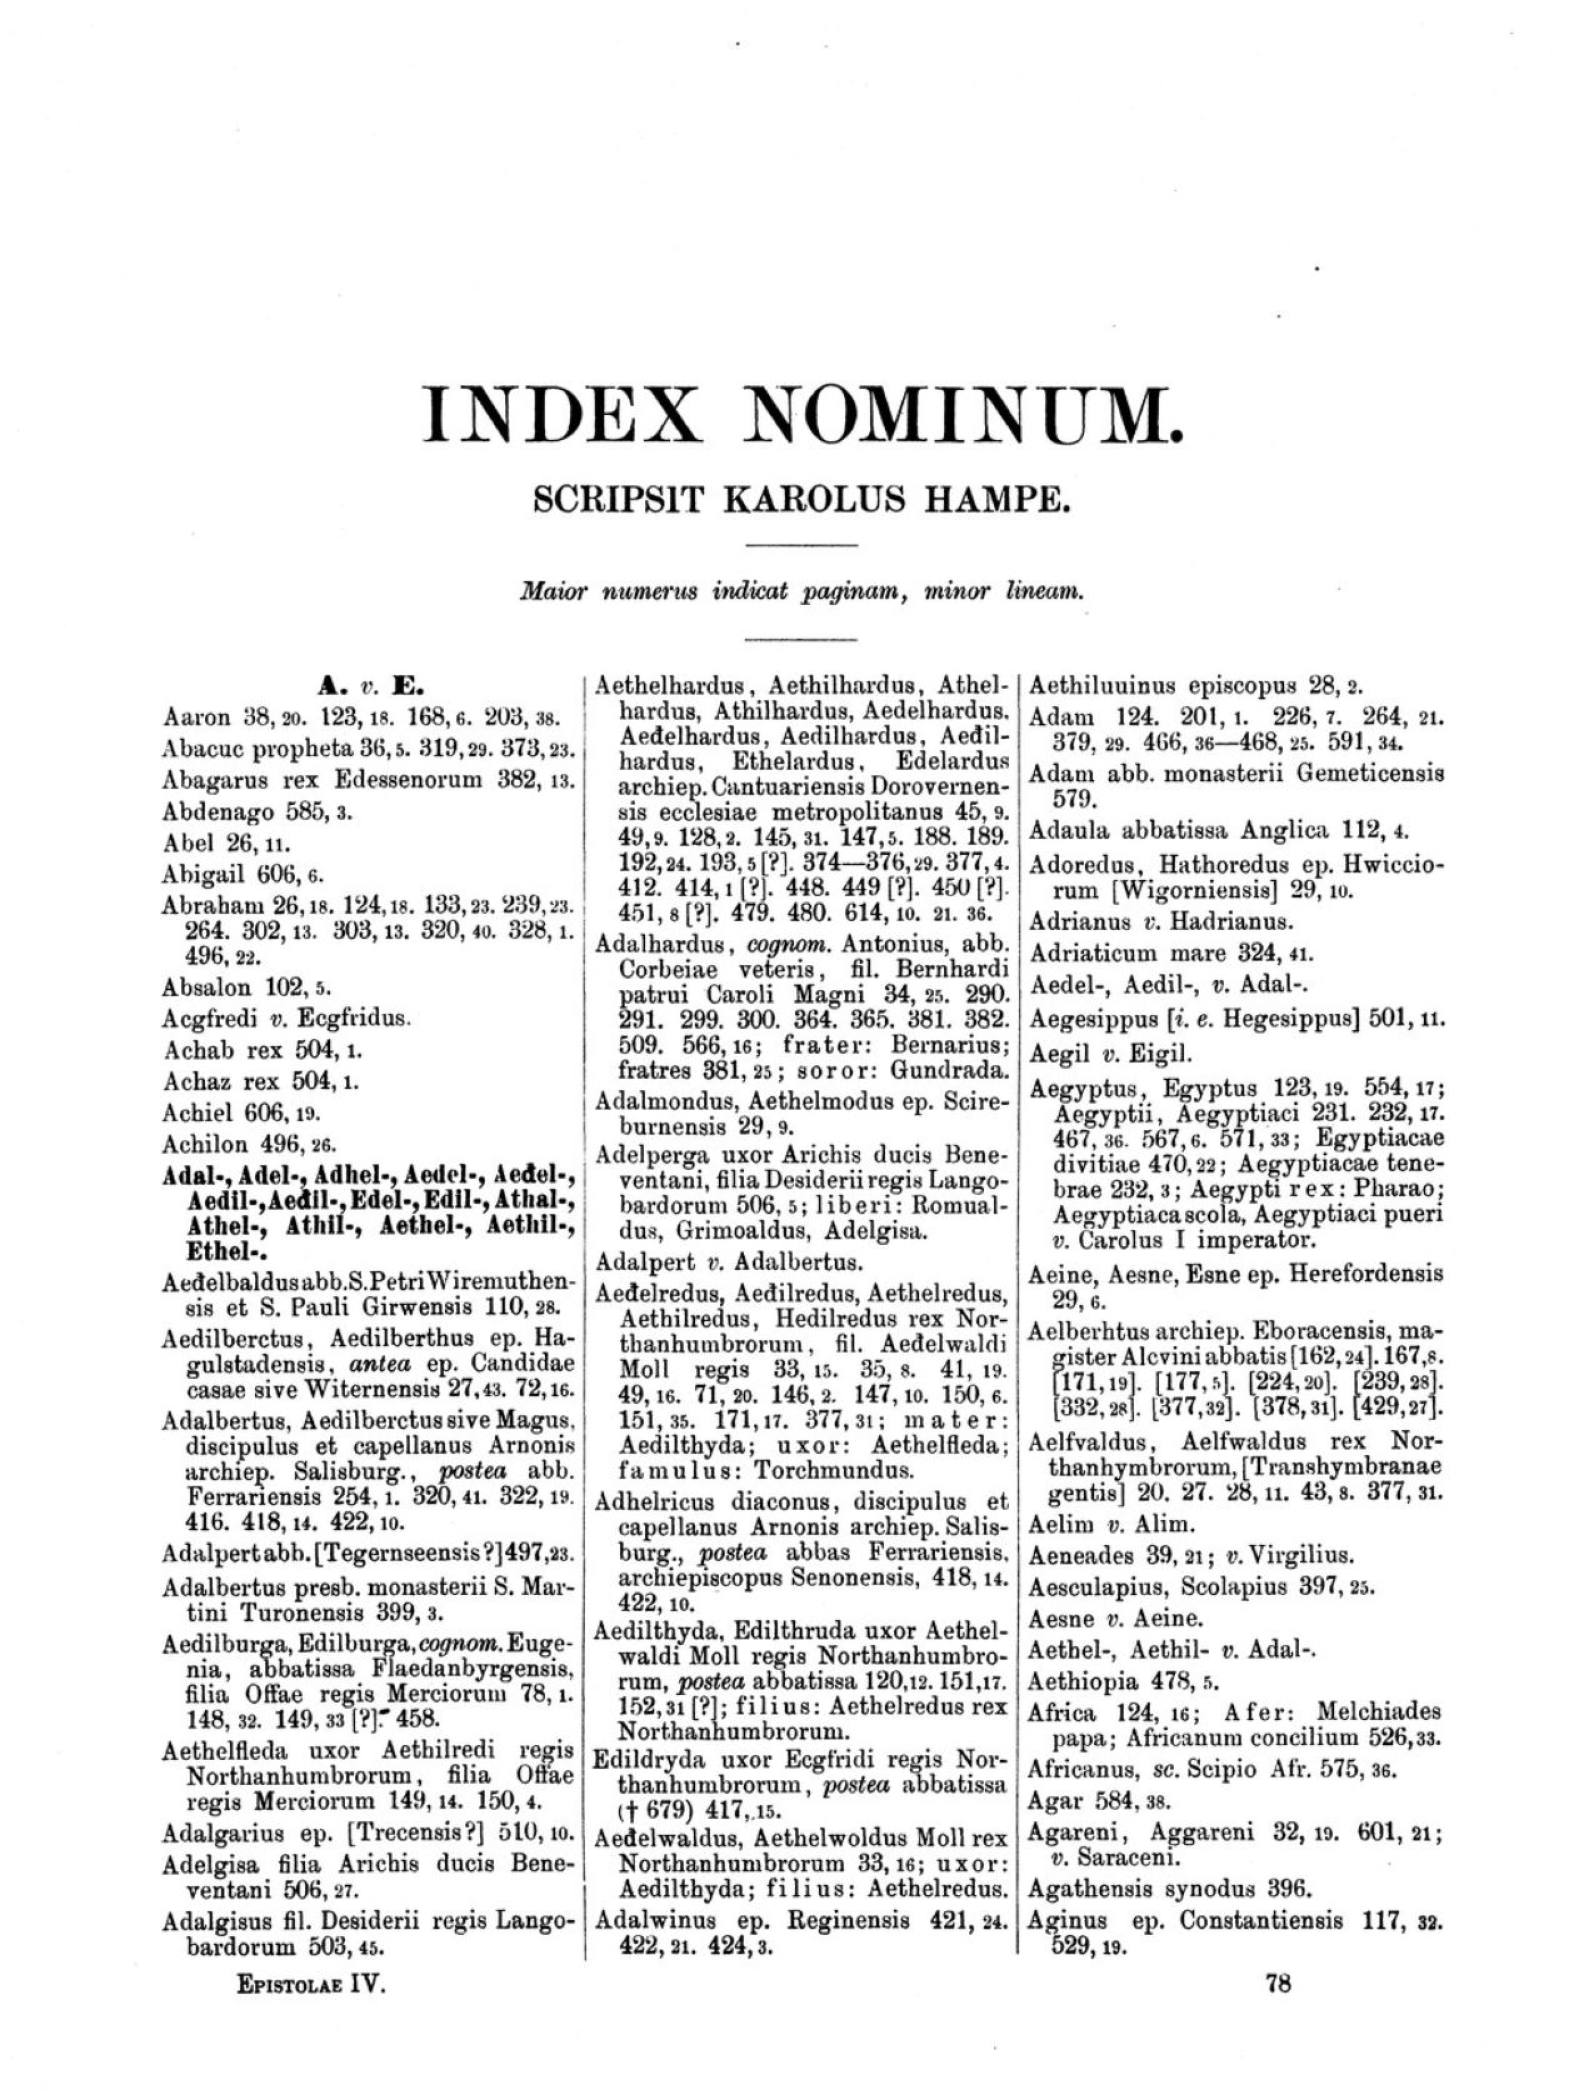

In [149]:
display("tessaractFiles/gray_text.png")

In [150]:
# now lets do gaussian blur on it 
# the gaussian blur not give a lot of information about text but can provide good info about structure
# as image has structure and apparance infor in low frequency and high frequency region

blur_car=cv2.GaussianBlur(gray_car,(7,7),0)
blur_text=cv2.GaussianBlur(gray_text,(7,7),0)

# and also save the images for them 
cv2.imwrite("tessaractFiles/blur_car.png",blur_car)
cv2.imwrite("tessaractFiles/blur_text.png",blur_text)

# if you want you can also see it using the display function

True

thresholding

In [151]:
# now apply threshold on it and get new images (like inversse of the image)
thresh_car=cv2.threshold(blur_car,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
thresh_text=cv2.threshold(blur_text,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

# now lets save the images

cv2.imwrite("tessaractFiles/thresh_car.png",thresh_car)
cv2.imwrite("tessaractFiles/thresh_text.png",thresh_text)

True

## dilation

In [152]:
# this kernal is different that of the kernal which we used with the numpy 
kernal=cv2.getStructuringElement(cv2.MORPH_RECT,(1,13))

# lets see how kernal looks 
cv2.imwrite("tessaractFiles/kernal.png",kernal)

True

In [153]:
# lets dilate the images
dilate_car=cv2.dilate(thresh_car,kernal,iterations=1)
dilate_text=cv2.dilate(thresh_text,kernal,iterations=1)

# save the dilated images
cv2.imwrite("tessaractFiles/dilate_car.png",dilate_car)
cv2.imwrite("tessaractFiles/dilate_text.png",dilate_text)

True

next part is getContours I. E. Bounding boxes

In [154]:
cnt_car=cv2.findContours(dilate_car,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnt_text=cv2.findContours(dilate_text,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [155]:
# filtering contours
cnt_car=cnt_car[0] if len(cnt_car)==2 else cnt_car[1]
cnt_text=cnt_text[0] if len(cnt_text)==2 else cnt_text[1]

In [156]:
# sorting the bounding boxes
cnt_car=sorted(cnt_car,key= lambda x:cv2.boundingRect(x)[0])
cnt_text=sorted(cnt_text,key= lambda x:cv2.boundingRect(x)[0])

lets mark the bonding box

In [169]:
def apply_bounding_boxes(image,cnts):
    i=0
    for c in cnts:
        # gets coordinate from c 
        x,y,w,h=cv2.boundingRect(c)
        # now mark bounding box on original image 
        # cv2.rectangle function is used to draw the bounding box on image 
        if h>200 and w>20:
            i=i+1
            cv2.rectangle(image,(x,y),(x+w,y+h),(36,255,12),2)
            # now also extract roi 
            cv2.imwrite("tessaractFiles/roi"+f"{i}"+".png",image[y:y+h,x:x+h])
    cv2.imwrite("tessaractFiles/BBtext.png",image)


In [168]:
apply_bounding_boxes(text,cnt_text)